In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **EDA-1**-  Bike Details Dataset

In [14]:
df= pd.read_csv('BIKE DETAILS.csv')

In [15]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [16]:
df.shape

(1061, 7)

In [17]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


**1- What is the range of selling prices in the dataset?**

In [18]:
print(f" range of selling price is {df['selling_price'].min(), df['selling_price'].max()}")

 range of selling price is (5000, 760000)


**2- What is the median selling price for bikes in the dataset?**

In [19]:
print(f" median selling price for bikes is {df['selling_price'].median()}")

 median selling price for bikes is 45000.0


**3- What is the most common seller type?**

In [20]:
# df['seller_type'].value_counts()
print(f"most common seller type is '{df['seller_type'].mode()[0]}'")

most common seller type is 'Individual'


**4-  How many bikes have driven more than 50,000 kilometers?**

In [21]:
# removing duplicates from data set
df.drop_duplicates(keep='first', inplace=True)

numBikes= df[df['km_driven']>50000]['name'].count()
print("bikes driven more than 50,000 km are", numBikes)

bikes driven more than 50,000 km are 168


**5- What is the average km_driven value for each ownership type?**

In [22]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32732.710240
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


**6- What proportion of bikes are from the year 2015 or older?**

In [23]:
bike_percent= len(df[df['year']<=2015]['year'])/ len(df['year']) *100
print('percent of bikes from the year 2015 or older is',round(bike_percent, 2))

percent of bikes from the year 2015 or older is 56.59


**7- What is the trend of missing values across the dataset?**

In [24]:
df.isna().sum()
# 433 values are missing for ex_showroom_price column

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,433


**8- What is the highest ex_showroom_price recorded, and for which bike?**

In [25]:
highest_ex_shPrice= df['ex_showroom_price'].max()
df[df['ex_showroom_price']== highest_ex_shPrice][['name', 'ex_showroom_price']]

# Harley-Davidson Street Bob bike is having highest ex_showroom_price(12,78,000)

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


**9- What is the total number of bikes listed by each seller type?**

In [26]:
df.groupby('seller_type')['name'].count()
# 6 bikes are listed for Dealer and 1049 bikes are listed for Individual

,name
seller_type,
Dealer,6
Individual,1049


**10- What is the relationship between selling_price and km_driven for first-owner bikes?**

In [27]:
df1= df[df['owner']=='1st owner']
df1['selling_price'].corr(df['km_driven'])

# for first-owner bikes, selling_price and km_driven are negatively corelated, meaning with increase in km_driven, selling price is decreasing,
# and we also know this is usually how it happens in real life

np.float64(-0.24220488863659748)

**11- Identify and remove outliers in the km_driven column using the IQR method?**

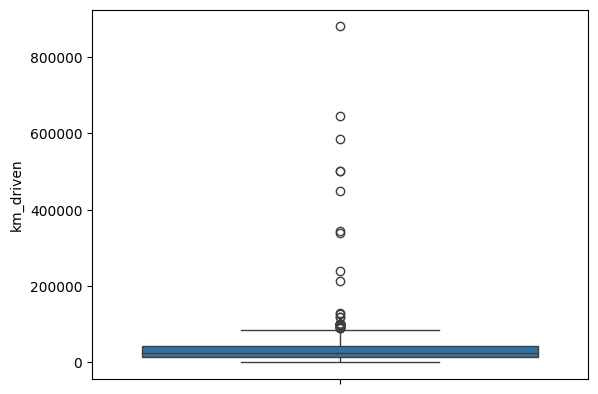

In [28]:
sns.boxplot(df['km_driven'])
plt.show()

In [29]:
Q1= df['km_driven'].quantile(0.25)
Q3= df['km_driven'].quantile(0.75)
IQR= Q3-Q1

Lower_f= Q1- 1.5*IQR
Upper_f= Q3+ 1.5*IQR

Outliers= df[(df['km_driven'] < Lower_f) | (df['km_driven'] > Upper_f)]['km_driven'].to_numpy()
print('Outliers are--> ',Outliers)

df_cleaned= df[(df['km_driven'] >= Lower_f) & (df['km_driven'] <= Upper_f)]
df_cleaned

Outliers are-->  [500000 130000 120000  90000  99000 100000 646000  95000  90000 585659
 100000 100000 100000 340000 101000 120000 100000  98000 880000  93000
 100000 100000 100000 240000 100000 100000 100000 345000 100000  93000
 450000 100000 127000  89000 100000 213000 500000  92233]


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


**12- Perform a bivariate analysis to visualize the relationship between year and selling_price.**

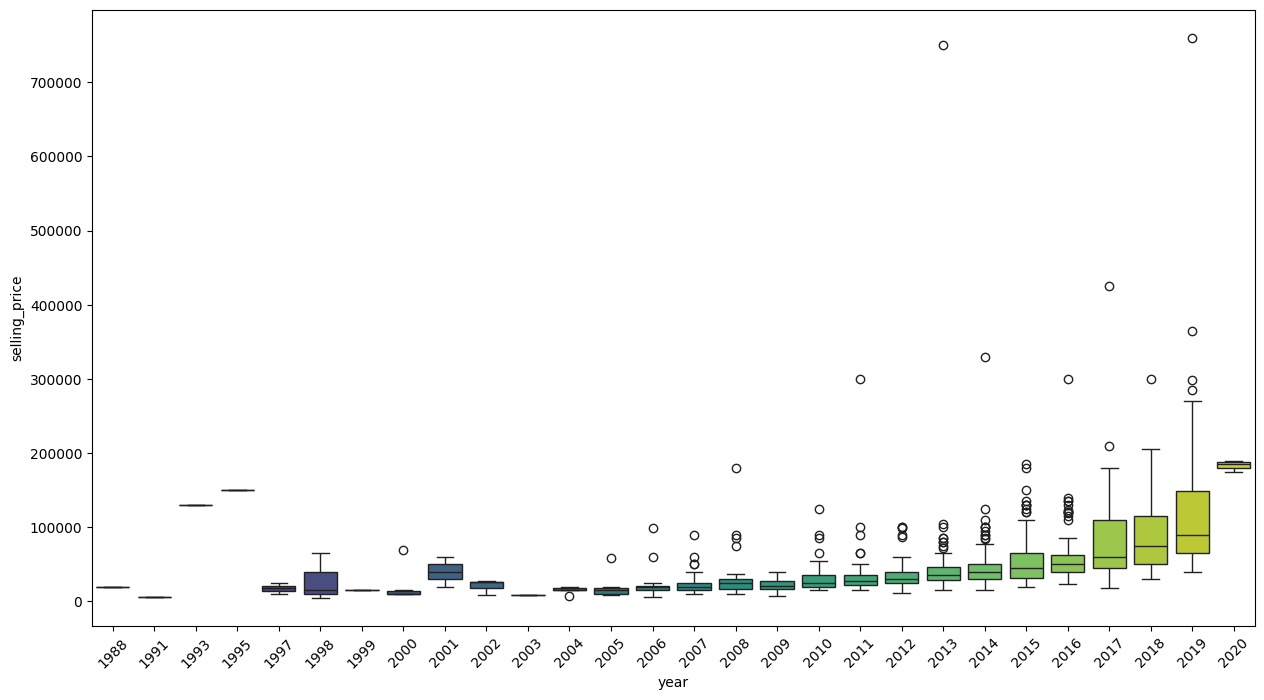

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='selling_price', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.show()

**13-  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?**

In [31]:
df['bike_age']= 2025- df['year']
df.groupby('bike_age')['selling_price'].mean()

,selling_price
bike_age,
5,183333.333333
6,119689.511628
7,87603.915385
8,78962.121212
9,58469.018692
10,56500.000000
11,48668.131868
12,51152.777778
13,35976.637681


**14- Which bike names are priced significantly above the average price for their manufacturing year?**

In [32]:
df2= df.copy()
df2['year_avg_price']= df.groupby('year')['selling_price'].transform('mean')

In [33]:
# taking 30% above the average as significantly above
# findin the percent
df2['pct_above_avg_price']= (df2['selling_price']- df2['year_avg_price'])/df2['year_avg_price']*100

# finding the bike names that are 30% above the average price for their manufacturing year
bike_names= df2[df2['pct_above_avg_price']>30]['name']

print('top 20 bike names that are priced significantly above the average price for their manufacturing year are-> ', bike_names[:20].to_numpy())

top 20 bike names that are priced significantly above the average price for their manufacturing year are->  ['Royal Enfield Classic 350' 'Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3'
 'Royal Enfield Classic Gunmetal Grey' 'Yamaha FZ25' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R'
 'Royal Enfield Thunderbird 350' 'Bajaj Dominar 400' 'KTM 390 Duke'
 'Yamaha FZ16' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Thunderbird 350' 'Royal Enfield Electra 4 S'
 'Mahindra Mojo XT300' 'Royal Enfield Thunderbird 350X'
 'Hero Honda Karizma ZMR [2010]']


**15-  Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

In [34]:
correlation= df.drop('bike_age', axis=1).corr(numeric_only=True)
correlation

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.400947,-0.212005,0.918659
year,0.400947,1.000000,-0.287227,0.124832
km_driven,-0.212005,-0.287227,1.000000,-0.120752
ex_showroom_price,0.918659,0.124832,-0.120752,1.000000


<Axes: >

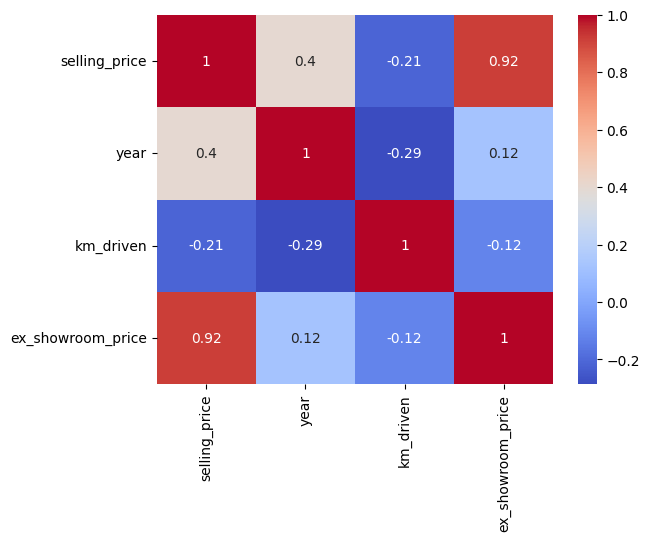

In [35]:
sns.heatmap(correlation, cmap='coolwarm', annot=True)

# **EDA-2**- Car Sale Dataset

In [36]:
df= pd.read_csv('Car Sale.csv')
df.shape

(23906, 16)

In [37]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

**1-  What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Saab-Belle Dodge                     28190.139888
Capitol KIA                          28189.703822
Race Car Help                        28163.372706
Name: Price ($), dtype: float64


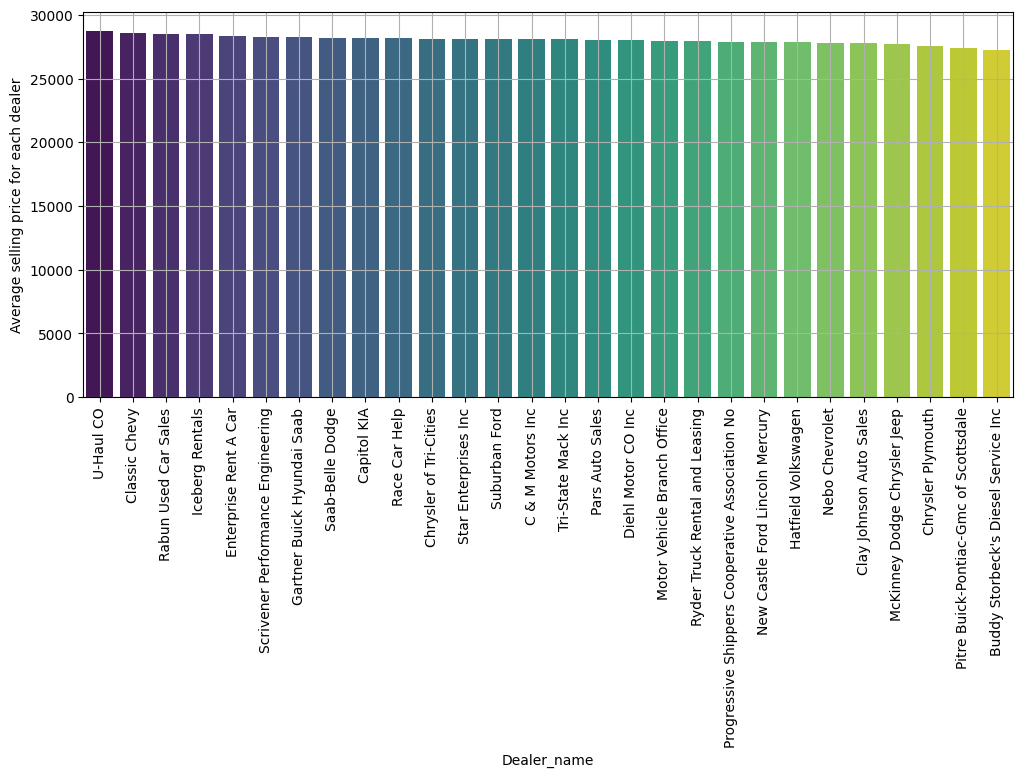

In [38]:
avg_sellingPrice= df.groupby('Dealer_Name')['Price ($)'].mean()
avg_sellingPrice_sorted= avg_sellingPrice.sort_values(ascending=False)
print(avg_sellingPrice_sorted[:10])
# all avg prices are closer to each other, thus sorting them clearly distinguish highest to lowest range

plt.figure(figsize=(12,5))
sns.barplot(avg_sellingPrice_sorted, palette='viridis')
plt.xlabel('Dealer_name')
plt.ylabel('Average selling price for each dealer')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**2- Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

In [39]:
df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)[:5]

# These are the top5 company with highest variation in prices, with Lincoln being the company with highest variation in prices

# INSIGHT----------------
# this shows that these company provides car with highest variation in prices thus capturing customers with different spending limit
# prividing edge in the market


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492


**3-  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

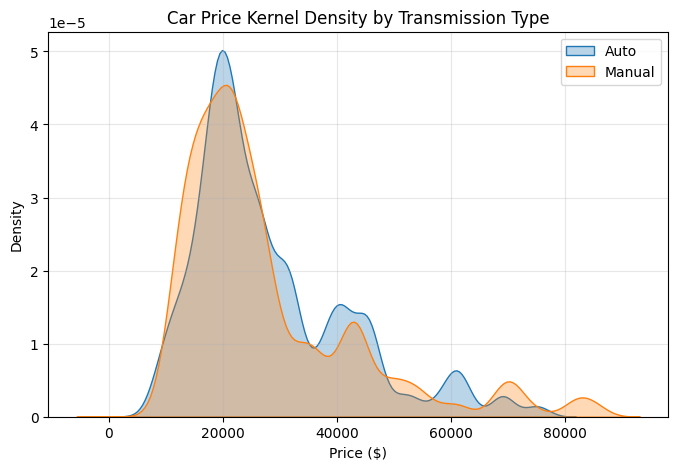

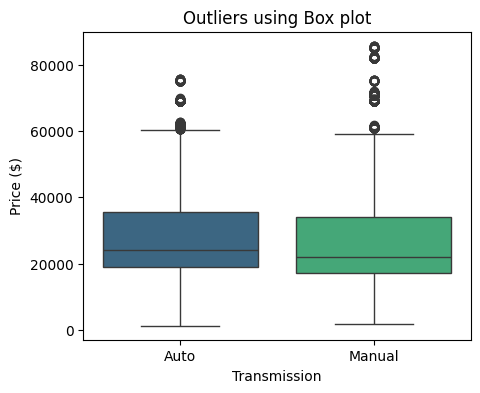

IQR for auto and manual are (16500, 17000)


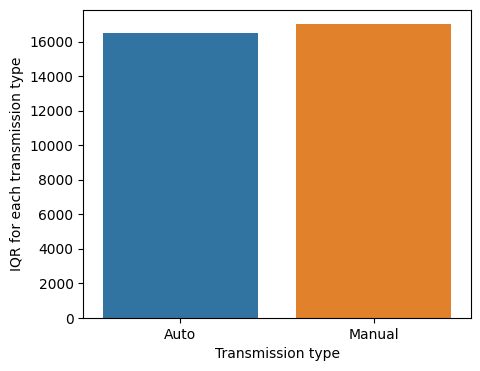

In [40]:
# showing Density distribution using KDE plot
plt.figure(figsize=(8,5))
for t in df['Transmission'].unique():
    subset = df[df['Transmission'] == t]
    sns.kdeplot(subset['Price ($)'], label=f'{t}', fill=True, alpha=0.3)
plt.title('Car Price Kernel Density by Transmission Type')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# showing Outliers using boxplot
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='viridis')
plt.title("Outliers using Box plot")
plt.show()

# calculating IQR for each transmision type and showing it using bar graph
Q1_auto= df[df['Transmission']=='Auto']['Price ($)'].quantile(0.25)
Q3_auto= df[df['Transmission']=='Auto']['Price ($)'].quantile(0.75)
IQR_auto= Q3_auto- Q1_auto

Q1_man= df[df['Transmission']=='Manual']['Price ($)'].quantile(0.25)
Q3_man= df[df['Transmission']=='Manual']['Price ($)'].quantile(0.75)
IQR_man= Q3_man- Q1_man

print(f'IQR for auto and manual are {int(IQR_auto), int(IQR_man)}')

data= pd.DataFrame({'Auto': [IQR_auto], 'Manual': [IQR_man]})
plt.figure(figsize=(5,4))
sns.barplot(data)
plt.xlabel("Transmission type")
plt.ylabel("IQR for each transmission type")
plt.show()

**4- What is the distribution of car prices across different regions?**

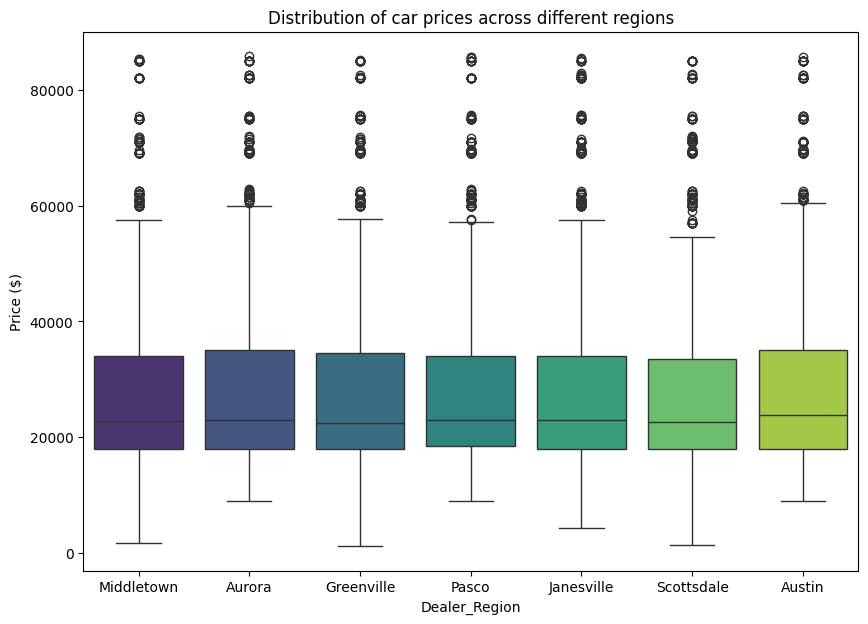

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='viridis')
plt.title('Distribution of car prices across different regions')
plt.show()

**5- What is the distribution of cars based on body styles?**

In [42]:
df.groupby('Body Style').describe().round(2)

Annual Income                                                     \
                   count       mean        std      min       25%       50%   
Body Style                                                                    
Hardtop           2971.0  821333.74  690727.32  10080.0  420600.0  725000.0   
Hatchback         6128.0  851174.05  727096.94  13500.0  392875.0  760000.0   
Passenger         3945.0  820355.50  717366.61  13500.0  360000.0  720000.0   
SUV               6374.0  823367.55  729900.88  13500.0  380000.0  720000.0   
Sedan             4488.0  829198.64  717186.48  13500.0  379500.0  742250.0   

                                  Price ($)            ...                    \
                  75%         max     count      mean  ...      75%      max   
Body Style                                             ...                     
Hardtop     1117500.0   6240000.0    2971.0  29151.10  ...  39000.0  82500.0   
Hatchback   1217500.0  11200000.0    6128.0  27127.04  ...  31001.0  85600.0   
Passenger   1177000.0   6125000.0    3945.0  28942.03  ...  37000.0  85800.0   
SUV         1152375.0   8000000.0    6374.0  26767.67  ...  31000.0  85500.0   
Sedan       1170000.0   6600000.0    4488.0  29832.80  ...  39500.0  69980.0   

             Phone                                                           \
             count        mean        std        min         25%        50%   
Body Style                                                                    
Hardtop     2971.0  7507323.80  864512.33  6000822.0  6786172.50  7504863.0   
Hatchback   6128.0  7502721.22  875218.52  6000101.0  6737516.25  7496782.5   
Passenger   3945.0  7499243.60  863163.31  6000458.0  6759771.00  7489588.0   
SUV         6374.0  7505444.80  863045.87  6000191.0  6761280.00  7517304.0   
Sedan       4488.0  7472333.15  868866.55  6000493.0  6712213.50  7472698.0   

                                   
                   75%        max  
Body Style                         
Hardtop     8244600.50  8999305.0  
Hatchback   8259095.00  8998836.0  
Passenger   8242754.00  8998864.0  
SUV         8256524.00  8998913.0  
Sedan       8223479.75  8999579.0  

[5 rows x 24 columns]

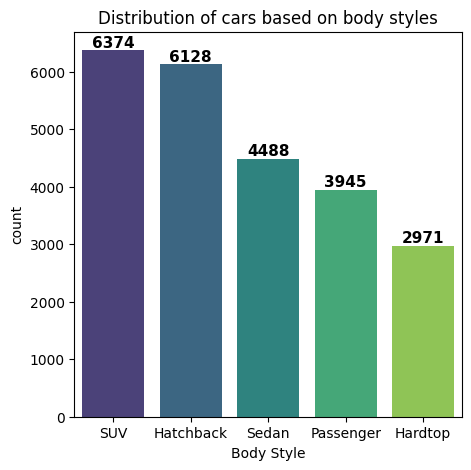

In [43]:
data= df['Body Style'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5,5))
ax= sns.barplot(data, palette='viridis')
plt.title('Distribution of cars based on body styles')
# plt.grid(True)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            f'{int(p.get_height())}',
            ha='center',
            va='bottom',
            fontsize=11,
            weight='bold'
            )

plt.show()

**6-  How does the average selling price of cars vary by customer gender and annual income?**

<Axes: xlabel='Income range', ylabel='Average selling price'>

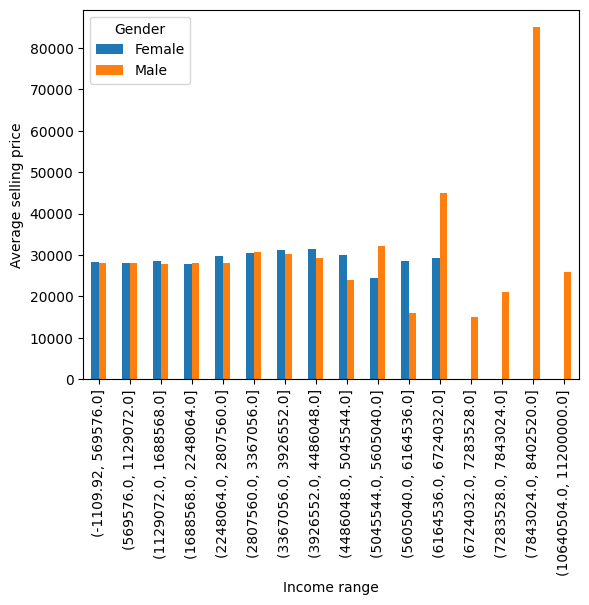

In [44]:
df1= df.copy()
df1['income_bin']= pd.cut(df1['Annual Income'], bins=20)
pivot= df1.pivot_table(values='Price ($)', index='Gender', columns='income_bin', aggfunc='mean').round(2)

pivot.T.plot(kind='bar', xlabel='Income range', ylabel="Average selling price")

**7-  What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

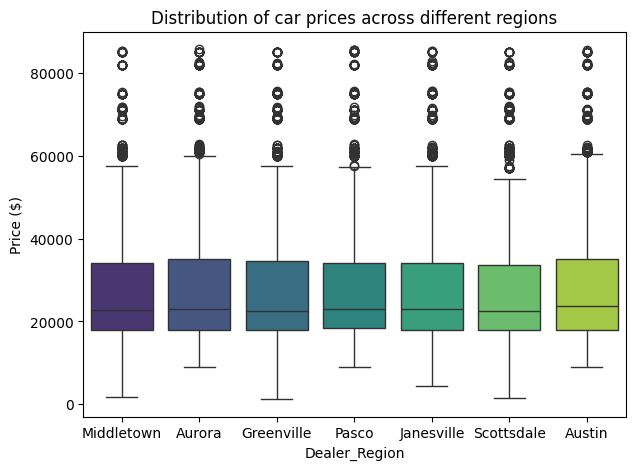

<Axes: xlabel='Dealer_Region', ylabel='count'>

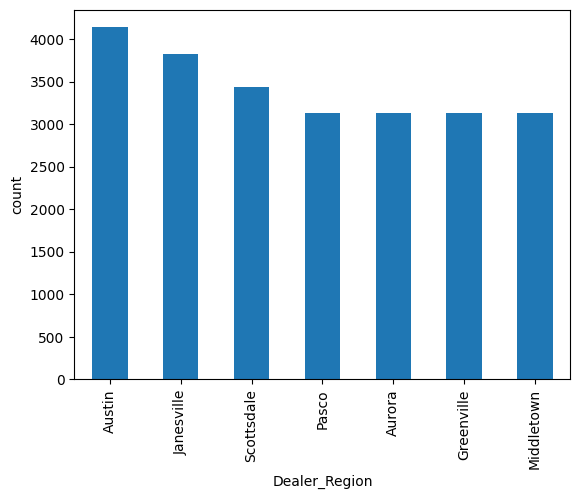

In [45]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='viridis')
plt.title('Distribution of car prices across different regions')
plt.show()

df.groupby('Dealer_Region')['Car_id'].count().sort_values(ascending=False).plot(kind='bar', ylabel='count')

**8-  How does the average car price differ between cars with different engine sizes?**

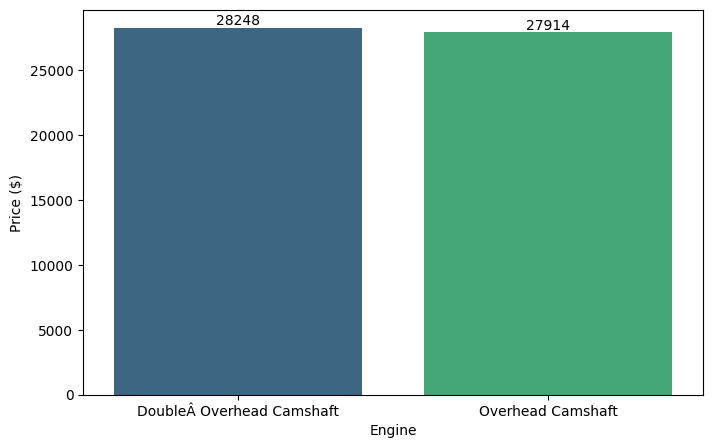

In [46]:
# grouping by column Engine and finding average for car price
avg_price_byEngine= df.groupby('Engine')['Price ($)'].mean().round(2)

# plotting bargraph
plt.figure(figsize=(8,5))
sns.barplot(avg_price_byEngine, palette='viridis')

# labeling value top of bar
ax= plt.gca()
for patch in ax.patches:
  height= patch.get_height()
  ax.text(patch.get_x() + patch.get_width()/2.0,
          patch.get_height(),
          f'{int(height)}',
          ha='center',
          va='bottom',
          )

**9- How do car prices vary based on the customer’s annual income bracket?**

<Axes: xlabel='income brackets', ylabel='car prices'>

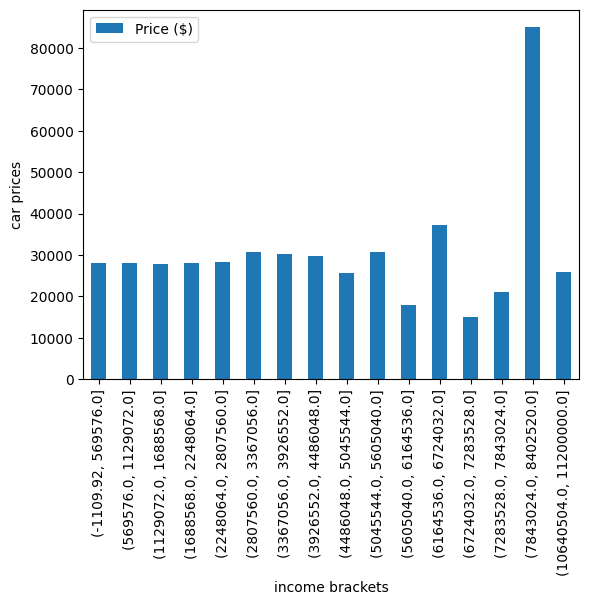

In [58]:
df1= df.copy()

# dividing annual income into brackets
df1['income_bin']= pd.cut(df1['Annual Income'], bins=20)

# mapping price for each income bracket using mean
pivot_table= df1.pivot_table(values='Price ($)', columns='income_bin', aggfunc='mean')

# plotting table
pivot_table.T.plot(kind='bar', xlabel="income brackets", ylabel='car prices')

**10- What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

In [61]:
# top 5 car models with the highest number of sales
top5= df['Model'].value_counts().head(5)
top5

,count
Model,
Diamante,418
Prizm,411
Silhouette,411
Passat,391
Ram Pickup,383


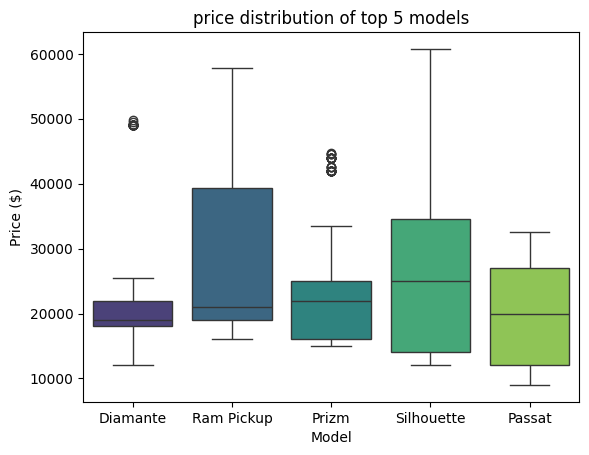

In [71]:
# price distribution of top 5 models
df1= df[df['Model'].isin(top5.index)]
sns.boxplot(data=df1, x='Model', y='Price ($)', palette='viridis')
plt.title('price distribution of top 5 models')
plt.show()

**11- How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

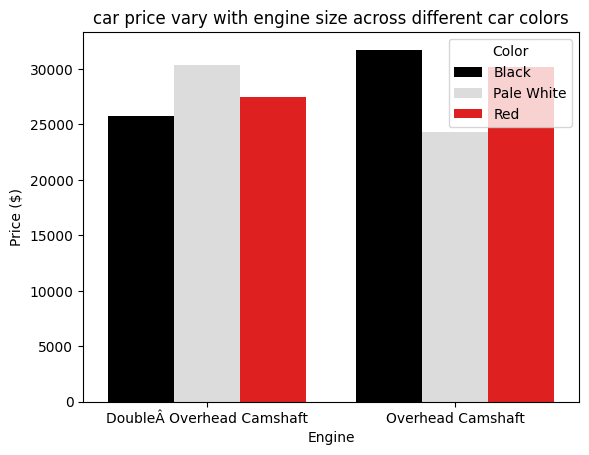

In [95]:
# method-1
# pivot= df.pivot_table(values='Price ($)', index='Color', columns='Engine', aggfunc='mean')
# df1= pivot.T.plot(kind='bar')

# method-2
table= df.groupby(['Engine', 'Color'])['Price ($)'].mean().round(2)
table_df= table.reset_index()
table_df

color_map = {
    'Black': '#000000',           # Black
    'Pale White': '#dcdcdc',      # Pale White
    'Red': '#FF0000'              # Red
}
sns.barplot(data= table_df, x='Engine', y='Price ($)', hue='Color', palette=color_map)
plt.title('car price vary with engine size across different car colors')
plt.show()

In [98]:
df.groupby('Color')['Price ($)'].std().round(2).head(1)

# insight---- Black color has the highest price variation

,Price ($)
Color,
Black,15286.07


**12- Is there any seasonal trend in car sales based on the date of sale?**

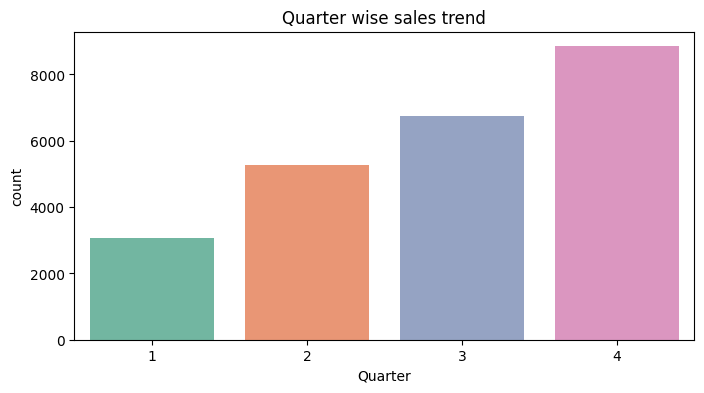

In [115]:
df['Date_dateTime']= pd.to_datetime(df['Date'])
df['Quarter']= df['Date_dateTime'].dt.quarter

df1= df.Quarter.value_counts().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df1, x='Quarter', y='count', palette='Set2')
plt.title('Quarter wise sales trend')
plt.show()
# sales are increasing with quarters

**13- How does the car price distribution change when considering different combinations of body style and transmission type?**

Body Style  Transmission
Hardtop     Auto            31520.19
            Manual          27016.94
Hatchback   Auto            25910.54
            Manual          28702.55
Passenger   Auto            28915.84
            Manual          28969.52
SUV         Auto            27501.40
            Manual          26079.02
Sedan       Auto            29955.29
            Manual          29664.27
Name: Price ($), dtype: float64


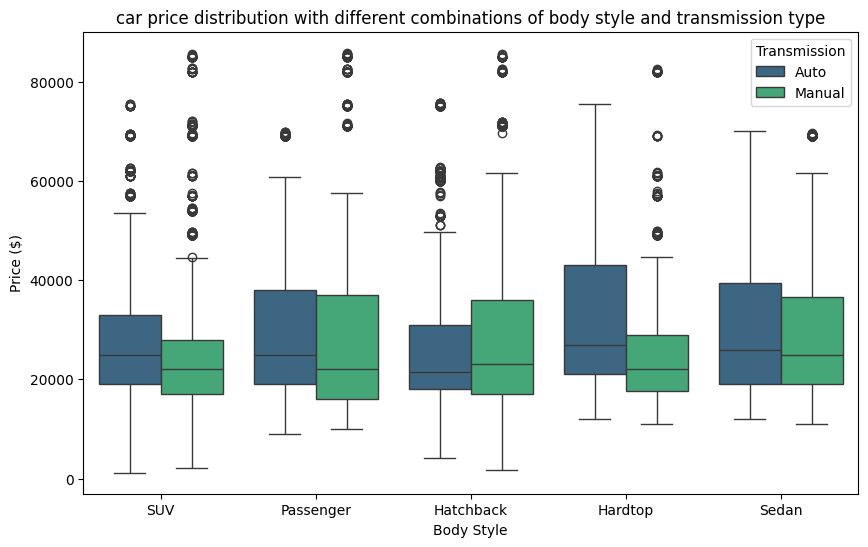

In [129]:
# method-1
price_table= df.groupby(['Body Style', 'Transmission'])['Price ($)'].mean().round(2)
print(price_table)

# price distribution graph
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='viridis')
plt.title('car price distribution with different combinations of body style and transmission type')
plt.show()

**14- What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

               Annual Income  Price ($)
Annual Income       1.000000   0.012065
Price ($)           0.012065   1.000000


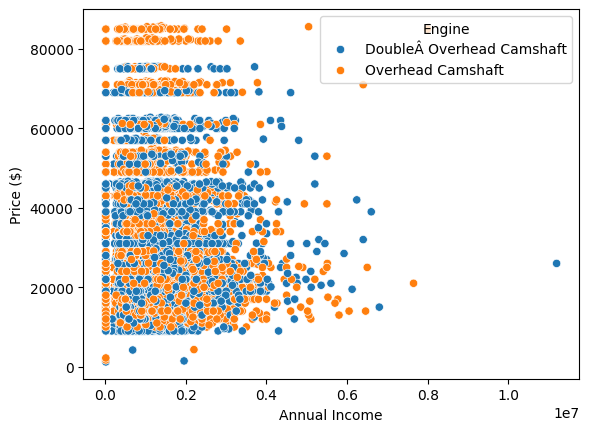

In [139]:
df1= df[['Annual Income', 'Price ($)']]
print(df1.corr(numeric_only=True))

sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Engine')
plt.show()

**15- How does the average car price vary across different car models and engine types?**

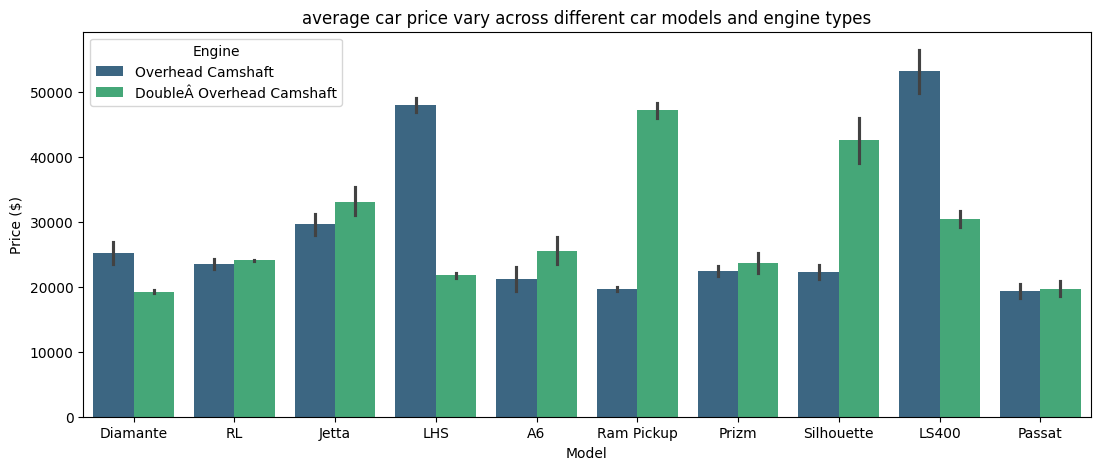

In [159]:
# taking top 10 car models
top10_model= df['Model'].value_counts().head(10)

# creating dataframe contining data only related to top10 car models
df1= df.copy()
df1= df1[df1['Model'].isin(top10_model.index)]

# plotting graph
plt.figure(figsize=(13,5))
sns.barplot(data=df1, x="Model", y='Price ($)', hue='Engine', palette='viridis')
plt.title('average car price vary across different car models and engine types')
plt.show()